# Table of Contents

### * [API Keys](#api_keys)
### * [Why Custom Models](#custom_models)
### * [Understanding the Data](#uploading_data)
### * [Upload the Data to an application](#data_init)
   * [Visualize data](#data_viz)
   
### * [Create and Train model](#create_and_train)
### * [Test the Model](#test)

In [1]:
### Clarifai libraries

from clarifai_grpc.channel.clarifai_channel import ClarifaiChannel
from clarifai_grpc.grpc.api import service_pb2_grpc,service_pb2,resources_pb2
from clarifai_grpc.grpc.api.status import status_code_pb2
import numpy as np
import os
import pandas as pd

In [2]:
# Create a stub which will be used to interact with the API 
stub = service_pb2_grpc.V2Stub(ClarifaiChannel.get_grpc_channel())

<a id = 'api_keys'></a>
## API Keys

* We interact with the Clarifai API through an API Key which is used to make calls to the API. 


* We can get an API by signing up for a Clarifai account and then getting an API key by creating an application. You can read about that at this link: https://docs.clarifai.com/clarifai-basics/authentication/app-specific-api-keys


* You can use the API key to make calls to the public models whose list can be found at the link below 
https://www.clarifai.com/developers/model-gallery


* Once you have generated an API key please copy/paste it in the following declartaion and replace it with *YOUR_API_KEY*


<a id = 'add_api_key'></a>

In [25]:
# Setting up an API connection with an API key
# This is how you authenticate.
api_auth= (('authorization', 'Key YOUR_API_KEY'),)


<a id ='custom_models'></a>
## Custom Models 

## Why Custom Models?

Custom Models can be created to answer business problems that are not answered by one of our Public Models. 

Training a Custom model is extremely easy in Clarifai's Platform. All you need to do is follow the simple steps listed below 

1. Create a taxonomy that you want to train a custom model for
2. Upload examples of the taxonomy.
3. Hit **"Train Model"** and you are done. 

**How much data do you need to train a decent model?**

Training a custom classification model falls under the umbrella of transfer learning. We use the learning of a larger AI model (General Model, Demographics, Face, etc) to speed up our model development. 

There is no hard rule on how much data would be needed to train a model but generally you want to start out with 50 images per category. 


## Learning by example

For our purpose we are going to create a custom model that can diffrentiate between two different kinds of bags and two different kinds of shoes. The types we will be diffrentiating 

**Shoes**
1. Sandals
2. Athletic

**Bags**
1. Tote
2. Clutches. 

**How do you get the data to the model**

There are two ways to get the data into an application 

1. [Upload publically accessible URLs with their attached labels(concepts)](https://docs.clarifai.com/api-guide/data/create-get-update-delete#add-inputs-via-url)
2. [Upload from your local machine.](https://docs.clarifai.com/api-guide/data/create-get-update-delete#add-inputs-via-bytes)


For our purposes, there is a CSV file linked in this folder which contains URLs as well as images with their associated concepts which we can use for our purposes. The name of the file is **lowes_input_with_concpets.csv**


<a id='uploading_data'></a>
### uploading data

In [4]:
### Let's look at the file 

df = pd.read_csv('lowes_input_with_concpets.csv').dropna()
df

,url,concepts
0,https://s3.amazonaws.com/clarifai-api/img3/pro...,bags_totes
1,https://s3.amazonaws.com/clarifai-api/img3/pro...,bags_totes
2,https://s3.amazonaws.com/clarifai-api/img3/pro...,bags_totes
3,https://s3.amazonaws.com/clarifai-api/img3/pro...,bags_totes
4,https://s3.amazonaws.com/clarifai-api/img3/pro...,bags_clutches
...,...,...
83,https://s3.amazonaws.com/clarifai-api/img3/pro...,shoes_sandals
84,https://s3.amazonaws.com/clarifai-api/img3/pro...,shoes_sandals
85,https://s3.amazonaws.com/clarifai-api/img3/pro...,shoes_sandals
88,https://s3.amazonaws.com/clarifai-api/img3/pro...,shoes_sandals


<a id='data_init'></a>

## What to do with this data. 

We are going to upload the data to an application which you would create in your Clarifai Portal and add the API key in the [cell block linked here](#add_api_key)

In [5]:
for idx, row in df.iterrows():
    # Loop through each row in the Dataframe and upload each url with its co-responding concept tag
    url = str(row[0])
    row_concepts = list(row[1:].values)
    upload_concepts = [k for k in row_concepts if k != 0]    
    print('*'*180)
    print('Uploading URL: {}\n'.format(url))
    print('concepts with this URL: ', upload_concepts)
    print('\n\n')
    
    post_inputs_response = stub.PostInputs(
        service_pb2.PostInputsRequest(
            inputs=[
                resources_pb2.Input(
                    data=resources_pb2.Data(
                        image=resources_pb2.Image(
                            url=url,
                            allow_duplicate_url=True
                        ),
                        concepts=[resources_pb2.Concept(id=concept, value=1.) for concept in upload_concepts]
                    )
                )
            ]
        ),
        metadata=api_auth
    )
    #Error handling
    if post_inputs_response.status.code != status_code_pb2.SUCCESS:    
        print("Post inputs failed, status: " + str(post_inputs_response.status.code))
        continue

************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/0a8ed811fd0fac40b2aea387768ab305

concepts with this URL:  ['bags_totes']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/bef778c00375875740e64b907c86213a

concepts with this URL:  ['bags_totes']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/

************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/555ab5f9bce9c1912a316337f116bb70

concepts with this URL:  ['bags_clutches']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/f836c5ff417380daaf92e27ecf06f734

concepts with this URL:  ['bags_totes']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b

************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/bc22ce477b3ab618fd89888b2a8d1a92

concepts with this URL:  ['bags_clutches']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/9769f2902c040dfc3852efe7e77d69ef

concepts with this URL:  ['shoes_athletic']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350

************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/5202497b5d90cd49961d9ab2d649b663

concepts with this URL:  ['shoes_sandals']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf350091b93/b2a8c69059556144ec164b1bc5e23a8c

concepts with this URL:  ['shoes_sandals']



************************************************************************************************************************************************************************************
Uploading URL: https://s3.amazonaws.com/clarifai-api/img3/prod/orig/3617f25f9ee5463497e7abf3500

<a id = 'data_viz'></a>
## Once uploaded your application screen would look like this 

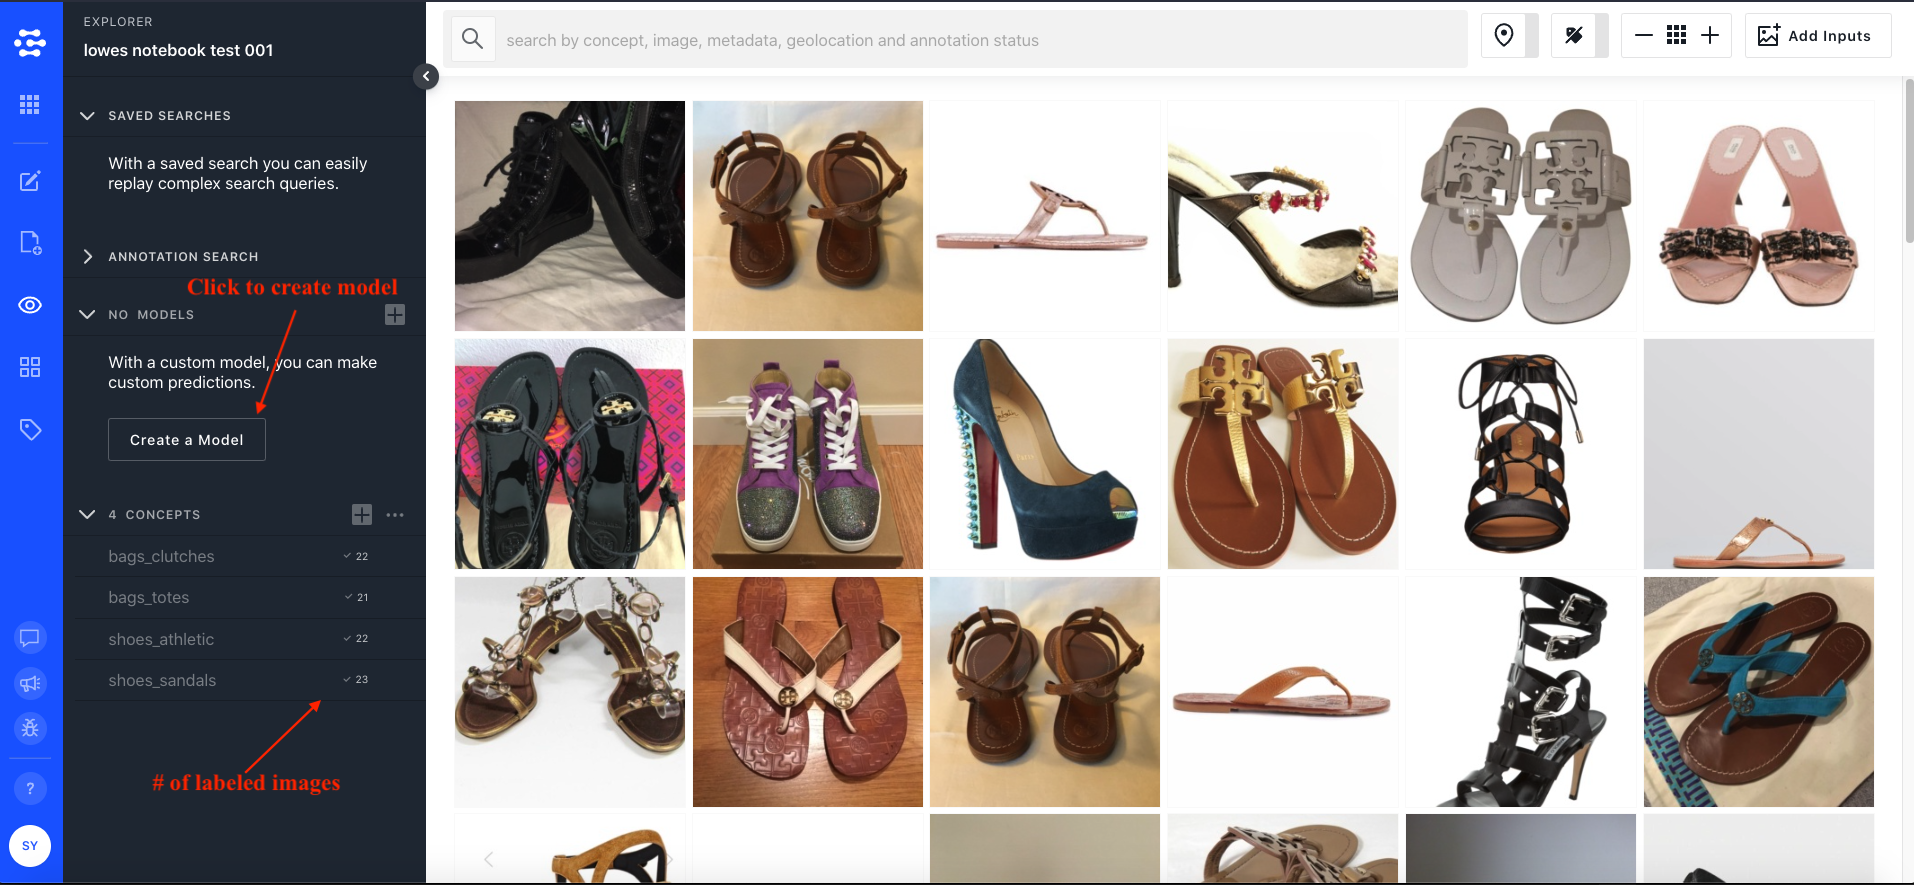

<a id = 'create_and_train'></a>
## 1. Create a Model

Once in the Create Model screen you will see the following the, select the "Context based Classifier option"

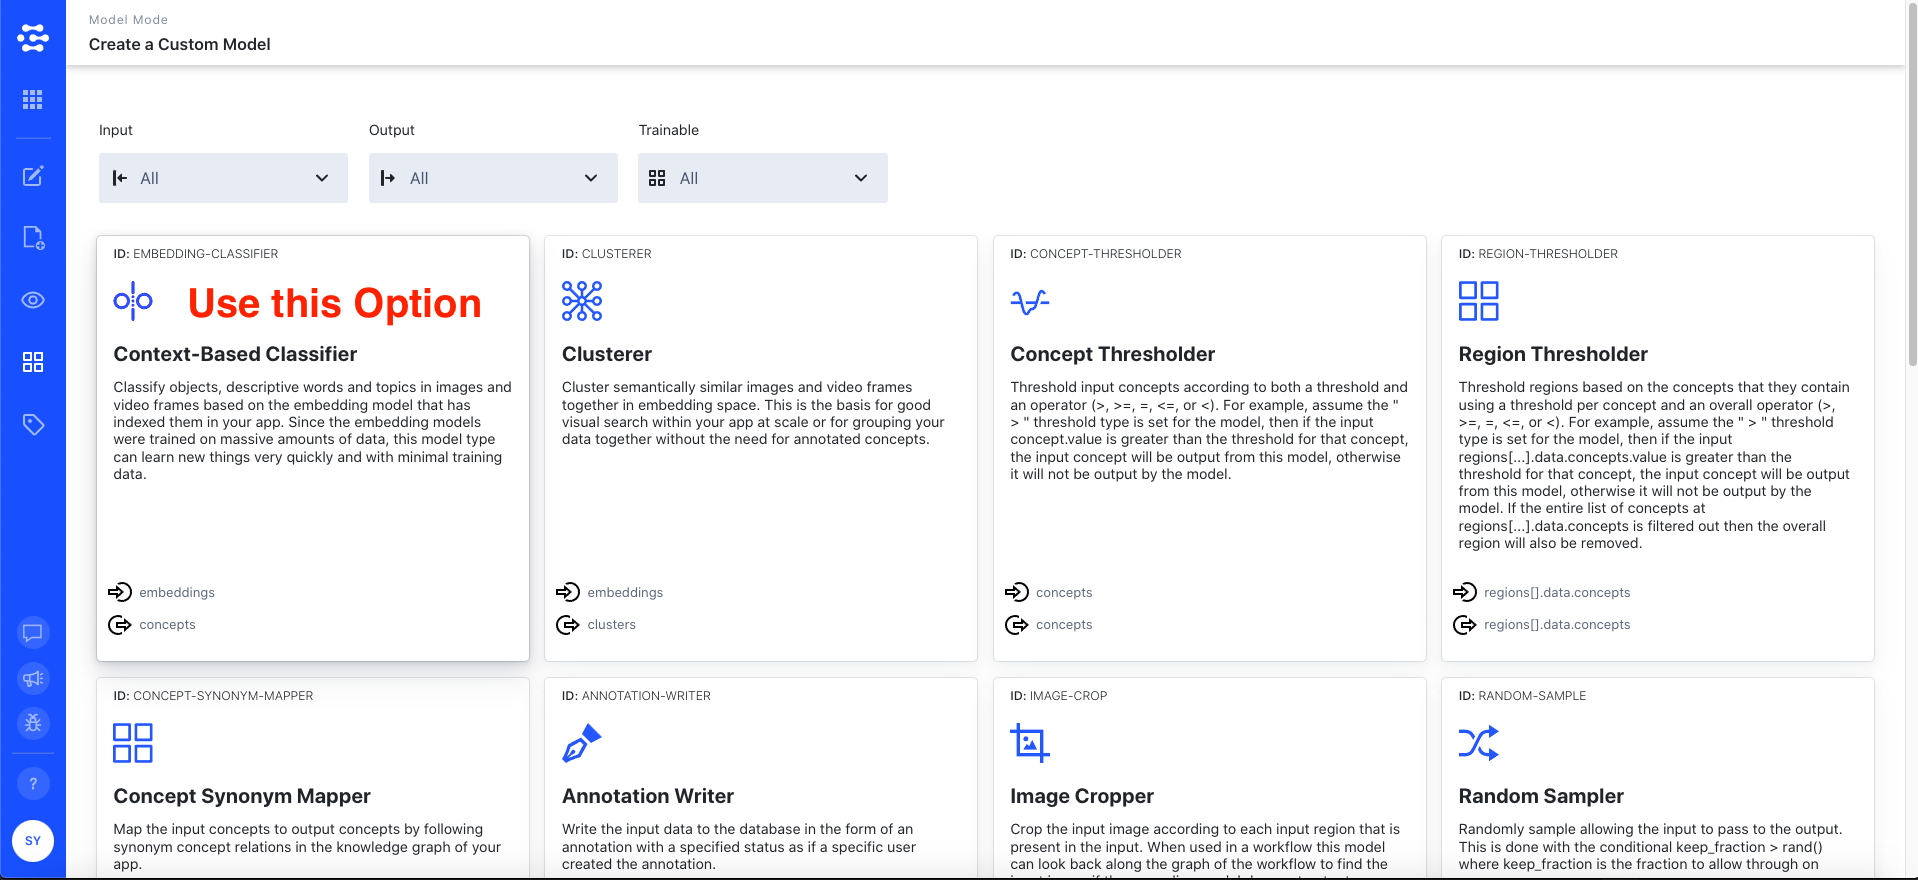



## 2. Add the concepts that you want to train and Create Model
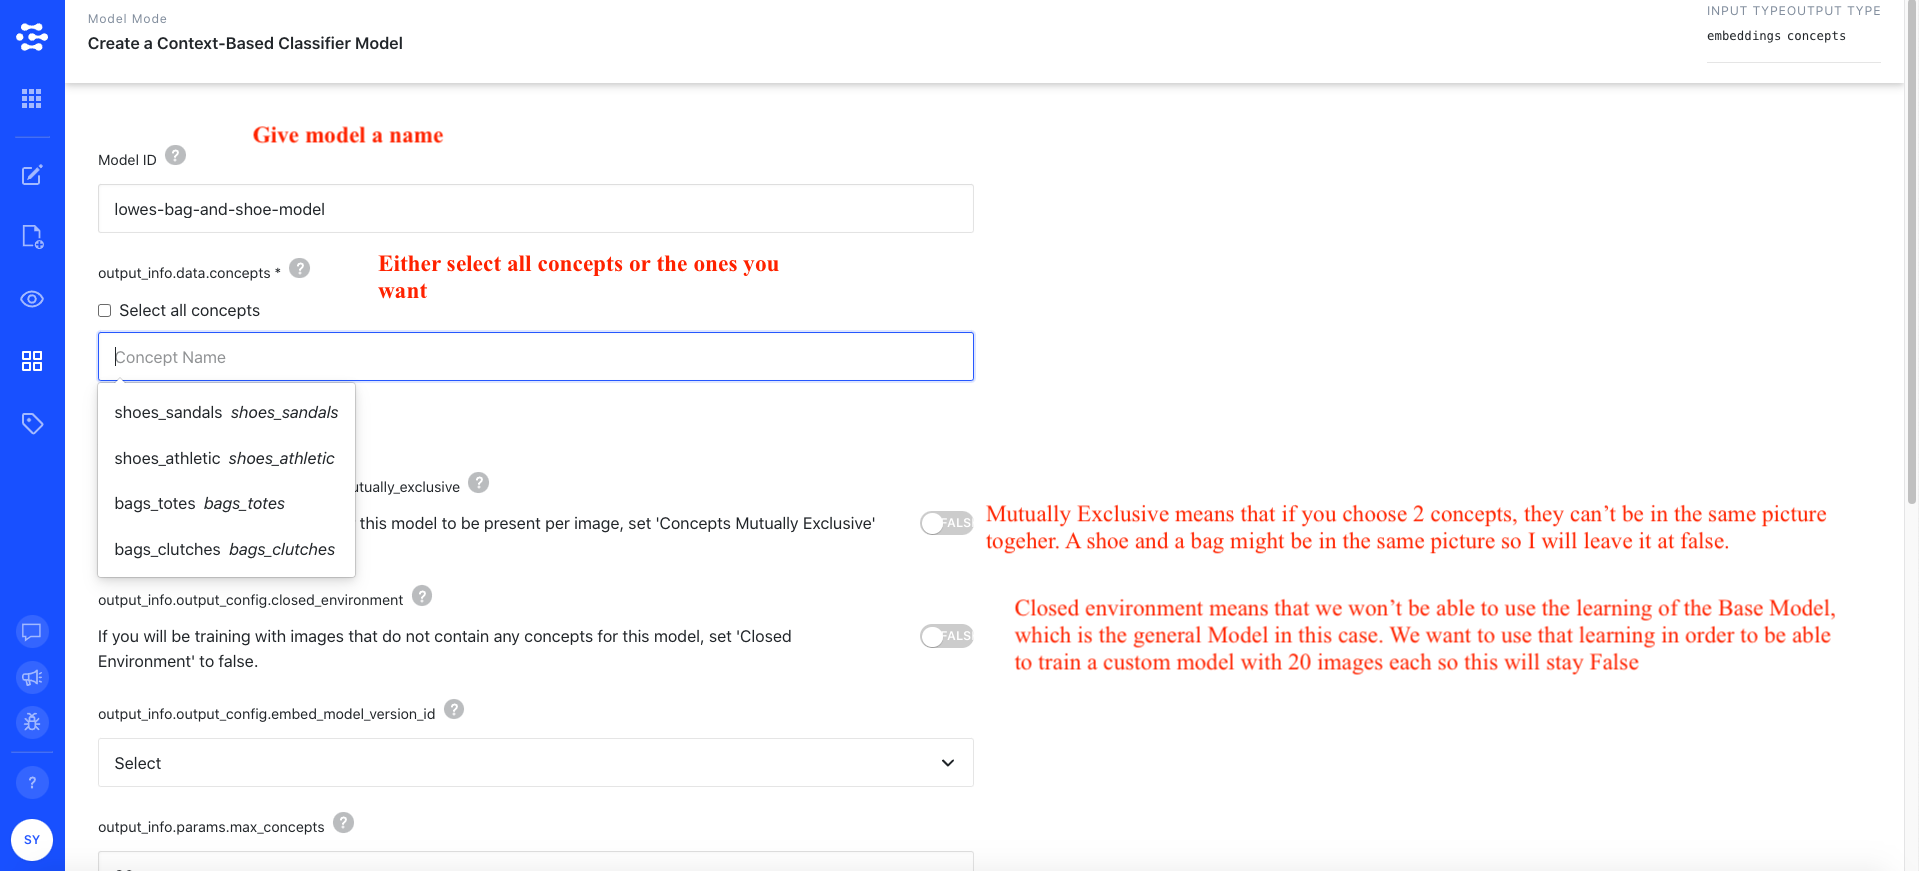


## 3. Train the Model 

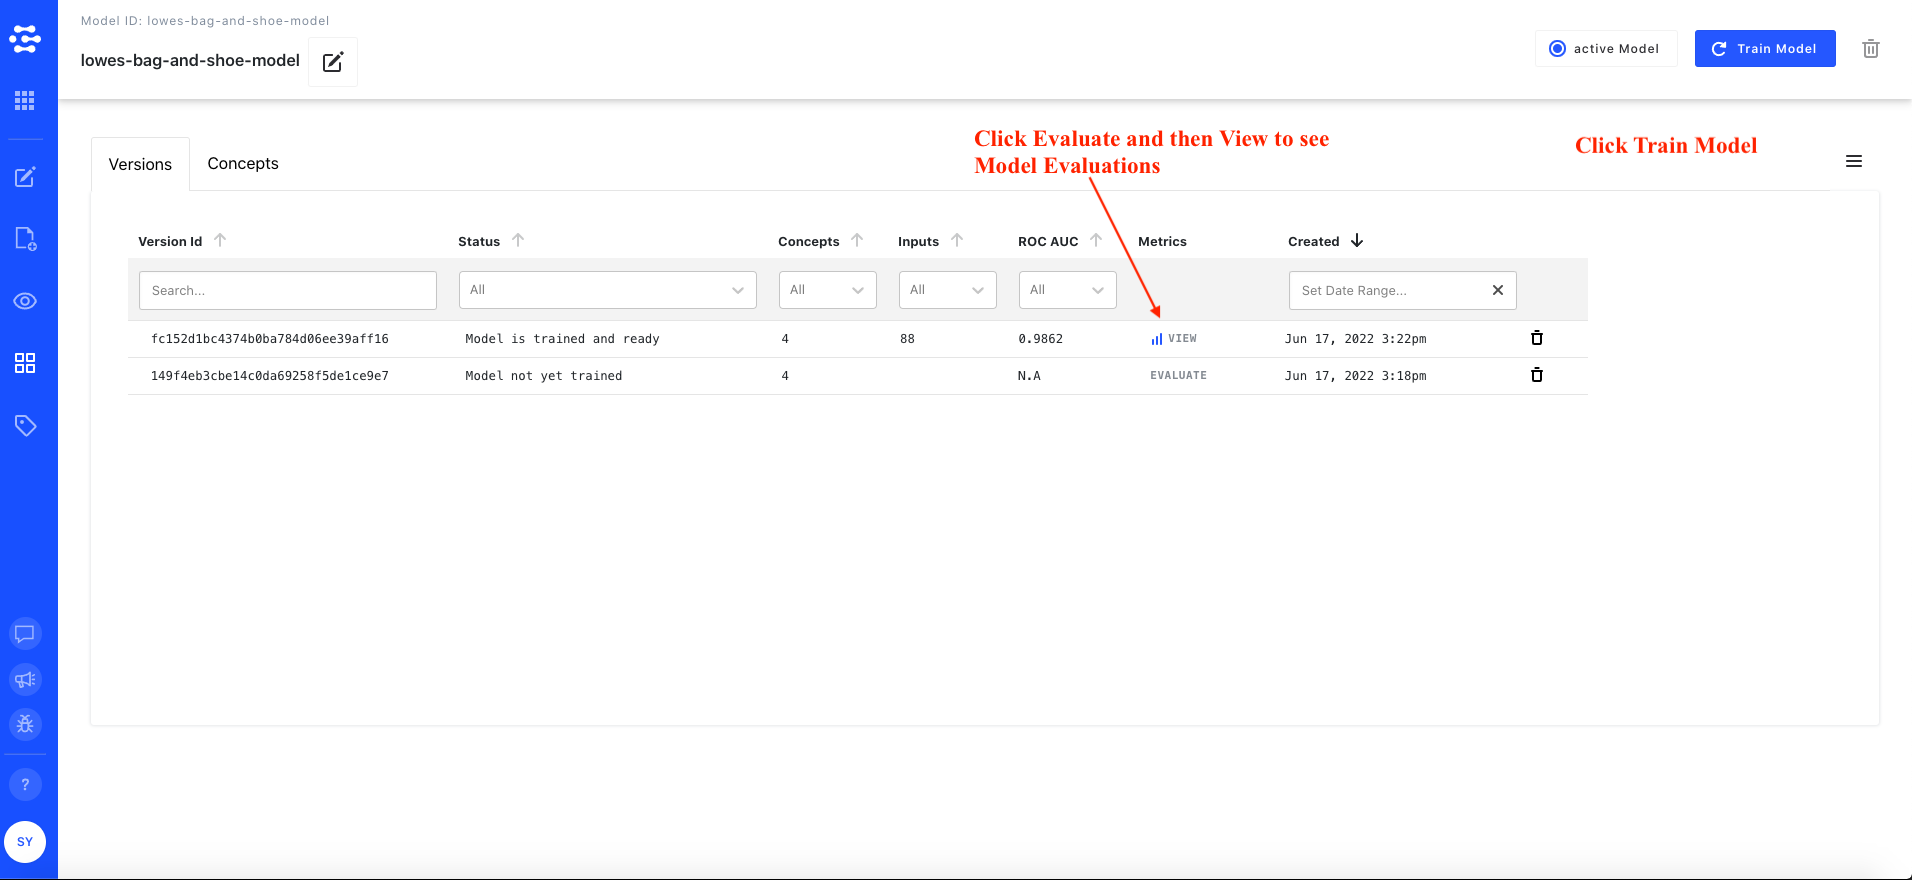

<a id ='test'></a>
## Test the Model 

We are going to use the following image to test the model. The documentation for testing a model is linked [here](https://docs.clarifai.com/api-guide/predict/images)

![show_image_test](https://s3.amazonaws.com/clarifai-api/img3/prod/large/3617f25f9ee5463497e7abf350091b93/0c449ed66e4fff16202bff90095d18fb?v=001)

In [17]:
post_model_outputs_response = stub.PostModelOutputs(
    service_pb2.PostModelOutputsRequest(        
        model_id='lowes-bag-and-shoe-model', #Give Model Id. Replace with the one you want
        inputs=[
            resources_pb2.Input(
                data=resources_pb2.Data(
                    image=resources_pb2.Image(
                        url='https://s3.amazonaws.com/clarifai-api/img3/prod/large/3617f25f9ee5463497e7abf350091b93/0c449ed66e4fff16202bff90095d18fb?v=001'
                    )
                )
            )
        ]
    ),
    metadata=api_auth
)

In [18]:
post_model_outputs_response

status {
  code: SUCCESS
  description: "Ok"
  req_id: "ac1773ecffc4d94b19a3e35189b82eff"
}
outputs {
  id: "f7273bd1f62d4e7893b2ce451ae7465b"
  status {
    code: SUCCESS
    description: "Ok"
  }
  created_at {
    seconds: 1655495077
    nanos: 900708171
  }
  model {
    id: "lowes-bag-and-shoe-model"
    name: "lowes-bag-and-shoe-model"
    created_at {
      seconds: 1655493489
      nanos: 171751000
    }
    app_id: "notebook-lowes-01"
    output_info {
      output_config {
      }
      message: "Show output_info with: GET /models/{model_id}/output_info"
      params {
        fields {
          key: "max_concepts"
          value {
            number_value: 20.0
          }
        }
        fields {
          key: "min_value"
          value {
            number_value: 0.0
          }
        }
        fields {
          key: "select_concepts"
          value {
            list_value {
            }
          }
        }
      }
    }
    model_version {
      id: "fc152d1b

In [24]:
#let's look at the output of the model

concepts = post_model_outputs_response.outputs[0].data.concepts
for i in range(len(concepts)):
    print(concepts[i].name,':',round(concepts[i].value,2))



shoes_athletic : 0.83
shoes_sandals : 0.01
bags_clutches : 0.0
bags_totes : 0.0
